## Comparison of Loss Functions in Multiclass Classification

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
N = 2000  # total number of examples
C = 3  # number of classes

X, Y = make_classification(n_samples=N,
                           n_classes=C,
                           n_clusters_per_class=1,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=42)

Y1h = to_categorical(Y, C)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y1h, test_size=0.2)

In [3]:
def dnn_model(input_shape=(2,), classes=C):

    inputs = Input(shape=input_shape)
    x = Dense(16, activation='relu')(inputs)
    x = Dense(16, activation='relu')(x)
    x = Dense(classes, activation='softmax')(x)

    return Model(inputs, x)


model = dnn_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2022-01-27 19:57:57.573992: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
stop_early = EarlyStopping(monitor='val_accuracy', patience=5)

def train_model(loss):
    
    model = dnn_model()
    model.compile(loss=loss, optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)
    
    return model, history


model_mse, history_mse = train_model('mse')
model_mae, history_mae = train_model('mae')
model_crossentropy, history_crossentropy = train_model('categorical_crossentropy')

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.5369 - val_loss: 0.1661 - val_accuracy: 0.6575
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.7531 - val_loss: 0.1091 - val_accuracy: 0.8825
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.8963 - val_loss: 0.0719 - val_accuracy: 0.8975
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9075 - val_loss: 0.0585 - val_accuracy: 0.9075
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9144 - val_loss: 0.0535 - val_accuracy: 0.9100
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9181 - val_loss: 0.0502 - val_accuracy: 0.9150
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9212 - val_loss: 0.0482 - val_accuracy: 0.9300
Epoch 8/100
5

50/50 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9269 - val_loss: 0.0562 - val_accuracy: 0.9300
Epoch 16/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9269 - val_loss: 0.0543 - val_accuracy: 0.9350
Epoch 17/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9287 - val_loss: 0.0529 - val_accuracy: 0.9400
Epoch 18/100
50/50 [==============================] - 0s 986us/step - loss: 0.0536 - accuracy: 0.9300 - val_loss: 0.0516 - val_accuracy: 0.9375
Epoch 19/100
50/50 [==============================] - 0s 975us/step - loss: 0.0526 - accuracy: 0.9312 - val_loss: 0.0506 - val_accuracy: 0.9375
Epoch 20/100
50/50 [==============================] - 0s 976us/step - loss: 0.0516 - accuracy: 0.9337 - val_loss: 0.0495 - val_accuracy: 0.9375
Epoch 21/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9344 - val_loss: 0.0492 - val_accuracy: 0.9350
Epoch 22/100


50/50 [==============================] - 0s 976us/step - loss: 0.2102 - accuracy: 0.9388 - val_loss: 0.2371 - val_accuracy: 0.9400
Epoch 30/100
50/50 [==============================] - 0s 999us/step - loss: 0.2094 - accuracy: 0.9388 - val_loss: 0.2336 - val_accuracy: 0.9400
Epoch 31/100
50/50 [==============================] - 0s 986us/step - loss: 0.2087 - accuracy: 0.9394 - val_loss: 0.2342 - val_accuracy: 0.9400
Epoch 32/100
50/50 [==============================] - 0s 990us/step - loss: 0.2082 - accuracy: 0.9413 - val_loss: 0.2339 - val_accuracy: 0.9400
Epoch 33/100
50/50 [==============================] - 0s 972us/step - loss: 0.2076 - accuracy: 0.9394 - val_loss: 0.2363 - val_accuracy: 0.9400
Epoch 34/100
50/50 [==============================] - 0s 990us/step - loss: 0.2073 - accuracy: 0.9400 - val_loss: 0.2336 - val_accuracy: 0.9400
Epoch 35/100
50/50 [==============================] - 0s 979us/step - loss: 0.2060 - accuracy: 0.9394 - val_loss: 0.2325 - val_accuracy: 0.9400
Epoch

50/50 [==============================] - 0s 995us/step - loss: 0.1782 - accuracy: 0.9450 - val_loss: 0.2012 - val_accuracy: 0.9400
Epoch 87/100
50/50 [==============================] - 0s 965us/step - loss: 0.1791 - accuracy: 0.9438 - val_loss: 0.2005 - val_accuracy: 0.9400
Epoch 88/100
50/50 [==============================] - 0s 967us/step - loss: 0.1773 - accuracy: 0.9463 - val_loss: 0.2021 - val_accuracy: 0.9400
Epoch 89/100
50/50 [==============================] - 0s 985us/step - loss: 0.1782 - accuracy: 0.9431 - val_loss: 0.2011 - val_accuracy: 0.9400
Epoch 90/100
50/50 [==============================] - 0s 956us/step - loss: 0.1768 - accuracy: 0.9456 - val_loss: 0.1988 - val_accuracy: 0.9400
Epoch 91/100
50/50 [==============================] - 0s 998us/step - loss: 0.1774 - accuracy: 0.9438 - val_loss: 0.1984 - val_accuracy: 0.9400
Epoch 92/100
50/50 [==============================] - 0s 947us/step - loss: 0.1762 - accuracy: 0.9444 - val_loss: 0.1990 - val_accuracy: 0.9400
Epoch

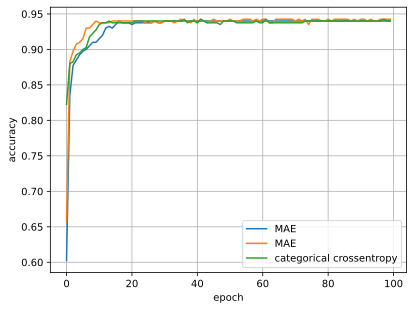

In [5]:
plt.figure()
plt.plot(history_mae.history['val_accuracy'], label='MAE')
plt.plot(history_mse.history['val_accuracy'], label='MAE')
plt.plot(history_crossentropy.history['val_accuracy'], label='categorical crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'categorical crossentropy')

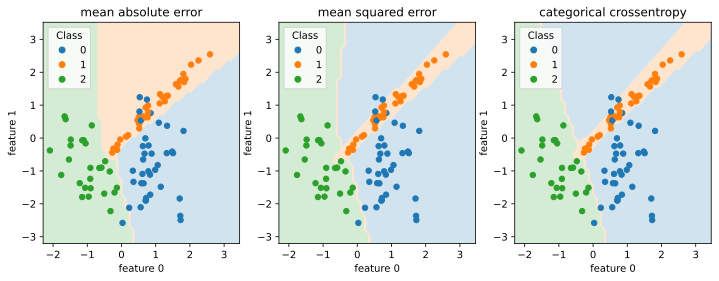

In [6]:
cmap = ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'][:C])

def plot_decision_boundaries(X, Y, model):

    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]))
    xx, yy = np.meshgrid(x, y)
    Xgrid = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(Xgrid)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=cmap, alpha=.2, levels=3)
    scatter = plt.scatter(X[0:100, 0], X[0:100, 1],
                          c=Y[0:100], s=30, cmap=cmap)
    plt.legend(*scatter.legend_elements(), title="Class")

    plt.xlabel('feature 0')
    plt.ylabel('feature 1')

    
plt.figure(figsize=(12,4))
plt.subplot(131)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_mae)
plt.title('mean absolute error')

plt.subplot(132)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_mse)
plt.title('mean squared error')

plt.subplot(133)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_crossentropy)
plt.title('categorical crossentropy')

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.